## Regression Data Exploration Report: Real Estate Price Prediction
#### Link to Data Set: https://www.kaggle.com/quantbruce/real-estate-price-prediction

In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

df = pd.read_csv("Real estate.csv")

In [24]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Part 1 - Summary

#### Selected Variables: Distance to Nearest MRT Station & House Price of Unit Area

In [77]:
MeanDistance = df["X3 distance to the nearest MRT station"].mean()
round(MeanDistance,2)

MeanPrice = df["Y house price of unit area"].mean()
round(MeanPrice, 1)

1083.89

38.0

In [76]:
df["X3 distance to the nearest MRT station"].max()
df["X3 distance to the nearest MRT station"].min()

df["Y house price of unit area"].max()
df["Y house price of unit area"].min()

6488.021

23.382839999999998

117.5

7.6

In [26]:
RangeDistance = df["X3 distance to the nearest MRT station"].max() - df["X3 distance to the nearest MRT station"].min()
round (RangeDistance,2)

RangePrice = df["Y house price of unit area"].max() - df["Y house price of unit area"].min()
RangePrice


6464.64

109.9

Text(0.5, 0, 'Distance from MRT')

Text(0, 0.5, 'Number of Transactions')

(array([251.,  42.,  47.,  30.,   7.,   3.,  27.,   2.,   2.,   3.]),
 array([  23.38284 ,  669.846656, 1316.310472, 1962.774288, 2609.238104,
        3255.70192 , 3902.165736, 4548.629552, 5195.093368, 5841.557184,
        6488.021   ]),
 <a list of 10 Patch objects>)

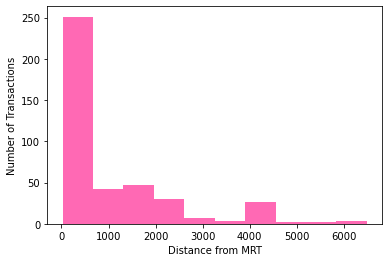

In [27]:
plt.xlabel('Distance from MRT')
plt.ylabel('Number of Transactions')
plt.hist(df["X3 distance to the nearest MRT station"],color = "hotpink")



Text(0.5, 0, 'Price of Unit')

Text(0, 0.5, 'Number of Transactions')

(array([ 28.,  95., 111., 115.,  52.,   9.,   3.,   0.,   0.,   1.]),
 array([  7.6 ,  18.59,  29.58,  40.57,  51.56,  62.55,  73.54,  84.53,
         95.52, 106.51, 117.5 ]),
 <a list of 10 Patch objects>)

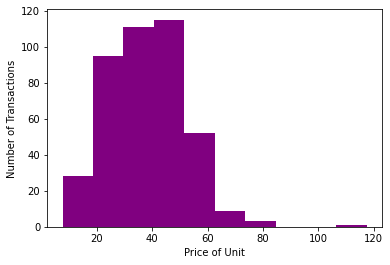

In [28]:
plt.xlabel('Price of Unit')
plt.ylabel('Number of Transactions')
plt.hist(df["Y house price of unit area"],color = "purple")



#### Summary

The two numeric variables I picked to compare are 'Distance to Nearest MRT Station' (refered to as first variable) and 'Price of Unit Area'(refered to as second variable). The mean distance to nearest MRT Station is 1083.89m (rounded to 2 dp) while the mean price of unit area is 38.0. The maximum and minimum values of the first variable are 6488.02m and 23.38m respectively while for the second variable, these values are 117.5 and 7.6. The range of the first variable is 6464.64m while the range of the second variable is 109.0. Both variables have a left skewed distribution whereby the first variable has a more extreme skew whereas the second variable is gently skewed and would be of a normal distribution if not for the outlier in the data. 



### Part 2 - Plot & Correlation 

Text(0.5, 0, 'Distance to MRT')

Text(0, 0.5, 'House Price of Unit Area')

Text(0.5, 1.0, 'Relationship Between Distance to MRT and Price')

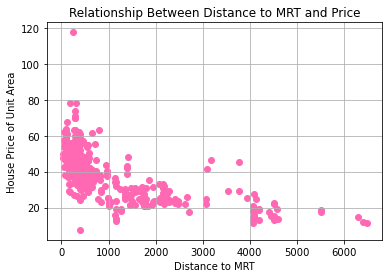

In [29]:
plt.scatter(df["X3 distance to the nearest MRT station"],df["Y house price of unit area"],color='hotpink')
plt.grid()
plt.xlabel('Distance to MRT')
plt.ylabel('House Price of Unit Area')
plt.title ('Relationship Between Distance to MRT and Price')

plt.show()

In [30]:
from scipy import stats
from sklearn.metrics import r2_score

def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())

r, p = stats.pearsonr(df["X3 distance to the nearest MRT station"],df["Y house price of unit area"])
r
df.corr()

-0.6736128553689182

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


#### Summary

The two variables are negatively correlated as seen from the plot and the correlation coeffiecient of -0.67. The negative correlation indicates that both variables have a statistical relationship such that the price of property decreases as the distance to the nearest MRT station increases. This suggests that the properties closest to MRT stations are of higher value. 

 ### Part 3 - Linear Regression Model

#### Selected Variables: Distance to Nearest MRT Station & House Price of Unit Area

In [31]:
x = df.drop(['Y house price of unit area'], axis=1)
y = df['Y house price of unit area']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 157)

In [32]:
x_train = X_train['X3 distance to the nearest MRT station']
x_test = X_test['X3 distance to the nearest MRT station']

In [33]:
x_train_expanded = np.expand_dims(x_train, axis=1)
x_test_expanded = np.expand_dims(x_test, axis=1)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_expanded, y_train)


LinearRegression()

In [49]:
print(regressor.coef_, regressor.intercept_)

[-0.00741423] 46.31986975824448


In [36]:
predictions = regressor.predict(x_test_expanded)

In [37]:
print(f'The R2 score is: {r2_score(y_test, predictions)}')
print(f'The RMSE score is {rmse(y_test, predictions)}')

The R2 score is: 0.391982510044381
The RMSE score is 10.340101291784409


Text(0.5, 1.0, 'Distance vs Price (Training set)')

Text(0.5, 0, 'Distance (X)')

Text(0, 0.5, 'Price(Y)')

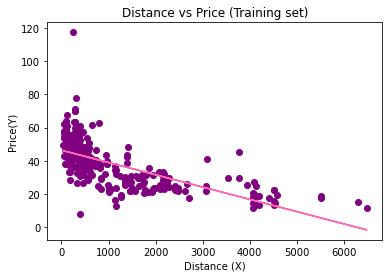

In [38]:
plt.scatter(x_train_expanded, y_train, color = 'purple')
plt.plot(x_train_expanded, regressor.predict(x_train_expanded), color = 'hotpink')
plt.title('Distance vs Price (Training set)')
plt.xlabel('Distance (X)')
plt.ylabel('Price(Y)')

plt.show()

Text(0.5, 1.0, 'Distance vs Price (Test set)')

Text(0.5, 0, 'Distance (X)')

Text(0, 0.5, 'Price(Y)')

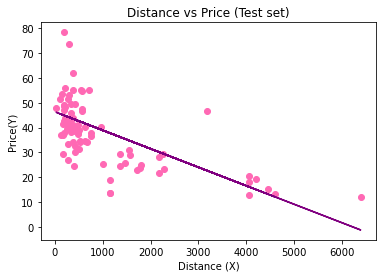

In [39]:
plt.scatter(x_test_expanded, y_test, color = 'hotpink')
plt.plot(x_test_expanded, regressor.predict(x_test_expanded), color = 'purple')
plt.title('Distance vs Price (Test set)')
plt.xlabel('Distance (X)')
plt.ylabel('Price(Y)')

plt.show()

In [41]:
p

4.639825030360989e-56

#### Summary 

The fitted plot lines of the predictor and response variables in both the training and test data, paired with the p-value that is significantly less than 0.05, it can be concluded that the distance to mrt is a statistically significant parameter for the house price per unit area. The model was a better fit on the training data than on the testing data. From the results from my training data, it can be seen that the price per unit area of the house decreased by 0.0074 for every meter increase in distance to nearest MRT station from when the price per unit area is 46.31.

### Part 4 - Multiple Regression Model 

In [70]:
x2 = df[['X3 distance to the nearest MRT station','X2 house age','X4 number of convenience stores']]
y2 = df['Y house price of unit area']

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20, random_state = 157)

In [72]:
regr.fit(x2_train, y2_train)
print(regr.coef_, regr.intercept_)

LinearRegression()

[-0.00582748 -0.25412239  1.08511582] 44.62531102443829


In [79]:
predictions2 = regr.predict(x2_test)

In [80]:
print(f'The R2 score is: {r2_score(y2_test, predictions2)}')
print(f'The RMSE score is {rmse(y2_test, predictions2)}')

The R2 score is: 0.5213211680477638
The RMSE score is 9.17463653974401


In [73]:
regr.predict([[306.59470,19.5,9]])

array([47.64929087])

#### Summary 

The variables used for the multiple regression model are distance to nearest MRT station, house age, number of convenience stores and house price per unit area. It can be seen that for every meter increase in distance to nearest MRT station, the price per unit area decreased by 0.0058; for every year increase in age of the property, the unit price decreased by 0.25; for every extra convenience store in the area, the unit price of property increased by 1.09 after unit price of the house is 44.63. When a random data point from the data set was inputted into the model, 
the predicted price per unit area for the property was 47.6 which is 5.4 more than the corresponding value listed in the data set. Adding the additional 2 variables improved the model as seen from the R2 score of 0.52 for the multiple regression model as compared to 0.39 of the linear regression model. 



### Part 5 - Ethical Issues & Potential to Improve 

#### Ethical Issues 

There are many intangible factors that may contribute to the price of the house such as interior decor, history, architectural design, availability of amenities etc, that cannot be numerically represented. If this model were to be used, many houses may become undervalued/overvalued since the model is unable to take these factors into consideration, causing buyers/sellers to face losses during transaction. 

#### Potential Improvement

The model could be refined if variables such as floor, street safety index, availability of eateries, distance to city centre, and availability of bus routes were included in the data. The inclusion of these variable will help us better understand the correlation of factors with the price. This will also allow us to create a model that can analyse the relationship between the availability of different modes of transport (bus/MRT) with the price of the house and determine if one is more important to buyers than the other. 
